<a href="https://colab.research.google.com/github/pranay-009/GAN/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
import tensorflow as tf
import os
import numpy as num
import matplotlib.pyplot as plt
import keras

In [ ]:
img_shape=(28,28,1)

In [ ]:
def generator():
    latent_shape=(100,)
    model=Sequential()
    model.add(Input(shape=latent_shape))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(num.prod(img_shape),activation="tanh"))
    model.add(Reshape(img_shape))
    
    "........................................................"
    return model
    

In [ ]:
gen=generator()
gen.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               25856     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 512)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                        

In [ ]:
def discriminator():
    model=Sequential()
    model.add(Input(shape=img_shape))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1,activation="sigmoid"))
    
    "................................................"
    return model

In [ ]:
dis=discriminator()
dis.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 533,505
Trainable params: 533,505
Non-tr

In [ ]:
def train(epochs,batch_size):
    half_batch=int(batch_size/2)
    (x_train,x_test),(y_train,y_test)=mnist.load_data()
    x_train = (x_train.astype(num.float32) - 127.5) / 127.5

    batch_step=int(x_train.shape[0]/batch_size)
    x_train=num.expand_dims(x_train,axis=3)
    for epoch in range(epochs):
        s=0
        for batch in range(batch_step):
            x=x_train[s:(s+half_batch)]
            s=s+batch_size;
            latency=num.random.normal(0,1,(half_batch,100))
            fake_img=gen.predict(latency)
            discrim_real=dis.train_on_batch(x,num.ones((half_batch,1)))
            discrim_fake=dis.train_on_batch(fake_img,num.zeros((half_batch,1)))
            #------------------------------------------------------
            discrim_loss=0.5*num.add(discrim_real,discrim_fake)
            #......................................................
            #......................................................
            noise=num.random.normal(0,1,(batch_size,100))
            labels=num.array([1]*batch_size)
            g_loss=combine.train_on_batch(noise,labels)
            if(batch==(batch_step-1)):
                print ("epoch :%d   batch size: %d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch,batch_step, discrim_loss[0], 100*discrim_loss[1], g_loss))


In [ ]:
dis.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
gen.compile(optimizer="adam",loss="binary_crossentropy")

In [ ]:
z=Input(shape=(100,))
img=gen(z)


In [ ]:
dis.trainable=False
valid_f=dis(img)

In [ ]:
combine=Model(z,valid_f)
combine.compile(optimizer="adam",loss="binary_crossentropy")

In [ ]:
combine.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 28, 28, 1)         1493520   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 533505    
                                                                 
Total params: 2,027,025
Trainable params: 1,489,936
Non-trainable params: 537,089
_________________________________________________________________


In [ ]:
train(100,64)

11501568/11490434 [==============================] - 0s 0us/step
epoch :0   batch size: 937 [D loss: 0.084831, acc.: 96.88%] [G loss: 7.280415]
epoch :1   batch size: 937 [D loss: 0.691811, acc.: 78.12%] [G loss: 2.880415]
epoch :2   batch size: 937 [D loss: 0.711862, acc.: 71.88%] [G loss: 4.027951]
epoch :3   batch size: 937 [D loss: 0.051490, acc.: 96.88%] [G loss: 5.847403]
epoch :4   batch size: 937 [D loss: 0.069801, acc.: 100.00%] [G loss: 5.867496]
epoch :5   batch size: 937 [D loss: 0.057149, acc.: 98.44%] [G loss: 6.399790]
epoch :6   batch size: 937 [D loss: 0.117971, acc.: 95.31%] [G loss: 7.471742]
epoch :7   batch size: 937 [D loss: 0.310939, acc.: 89.06%] [G loss: 5.877781]
epoch :8   batch size: 937 [D loss: 0.313973, acc.: 87.50%] [G loss: 7.803111]
epoch :9   batch size: 937 [D loss: 0.313604, acc.: 85.94%] [G loss: 6.656828]
epoch :10   batch size: 937 [D loss: 1.622880, acc.: 60.94%] [G loss: 2.424783]
epoch :11   batch size: 937 [D loss: 0.184201, acc.: 95.31%] [G 

In [ ]:
val=num.random.normal(0,1,(4,100))

In [ ]:
val.shape

(4, 100)

In [ ]:
pred=gen.predict(val)

In [ ]:
pred.shape

(4, 28, 28, 1)

In [ ]:
re_pred=num.squeeze(pred,axis=3)

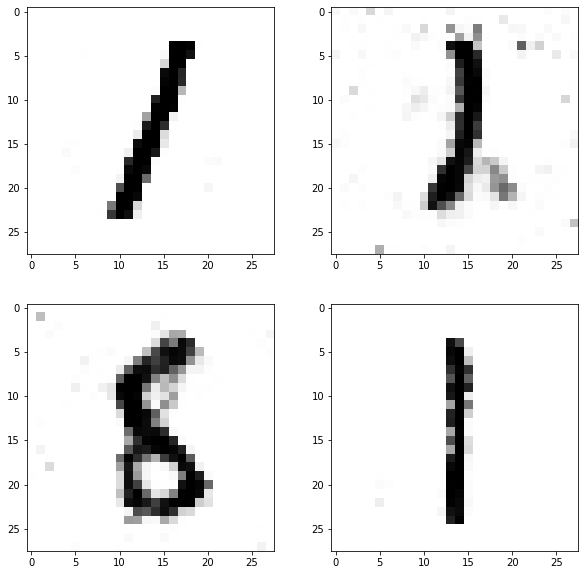

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(re_pred[0],cmap="binary")
plt.subplot(2,2,2)
plt.imshow(re_pred[1],cmap="binary")
plt.subplot(2,2,3)
plt.imshow(re_pred[2],cmap="binary")
plt.subplot(2,2,4)
plt.imshow(re_pred[3],cmap="binary")
